In [1]:
# import the packages
import numpy as np
import matplotlib.pyplot as plt
from dnn_utils import *

In [2]:
# image size: 28 * 28
img_size = 28

In [3]:
# get the training dataset
X_train, Y_train, Ytr = load_train_data(img_size)

In [4]:
# get the test dataset
X_test, Y_test, Yte = load_test_data(img_size)

In [5]:
# Explore the dataset
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(60000, 784)
Y_train shape:(60000, 10)
X_test shape:(10000, 784)
Y_test shape:(10000, 10)


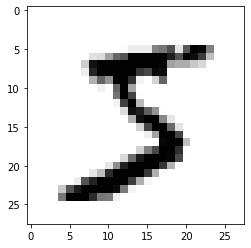

In [6]:
# see any image of the dataset
i = 0
img = X_train[i, :]
img = img.reshape(28, 28)
plt.imshow(255-img, cmap='gray')

In [7]:
# Reshape the dataset
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

# Standardize data to have feature values between 0 and 1.
X_train = X_train/255.
X_test = X_test/255.
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(784, 60000)
Y_train shape:(10, 60000)
X_test shape:(784, 10000)
Y_test shape:(10, 10000)


In [8]:
# define the layers of the model
layer_dims = [784, 35, 20, 10] # 3-layer model

In [38]:
# define the model
# the model uses mini batch gradient descent and adam optimizer
def model(X, Y, layers_dims, learning_rate = 0.0007, mini_batch_size = 64, beta1 = 0.9,
          beta2 = 0.999, epsilon = 1e-8, lambd = 0.6, num_epochs = 2000, print_cost = True):
    
    costs = []
    t = 0
    m = X.shape[1]
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)
    v, s = initialize_adam(parameters)
    
    for i in range(num_epochs):
        
        # Define the random minibatches.
        minibatches = random_mini_batches(X, Y, mini_batch_size)
        cost_total = 0
        
        for minibatch in minibatches:
            
            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            
            # Forward propagation
            AL, caches = L_model_forward(minibatch_X, parameters)

            # Compute cost
            cost_total += compute_cost(AL, minibatch_Y, caches, lambd)

            # Backward propagation
            grads = L_model_backward(AL, minibatch_Y, caches, lambd)

            # Update parameters
            t = t + 1
            parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                     t, learning_rate, beta1, beta2, epsilon)
        cost_avg = cost_total
        
        if print_cost and i % 10 == 0:
            print("Cost after iteration %i: %f" %(i, cost_avg))
            costs.append(cost_avg)
            
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 143.816105
Cost after iteration 10: 29.145121
Cost after iteration 20: 24.180877
Cost after iteration 30: 21.757453
Cost after iteration 40: 20.207347
Cost after iteration 50: 19.323007
Cost after iteration 60: 18.672481
Cost after iteration 70: 18.310502
Cost after iteration 80: 18.096416
Cost after iteration 90: 17.884080
Cost after iteration 100: 17.600884
Cost after iteration 110: 17.502131
Cost after iteration 120: 17.350181
Cost after iteration 130: 17.353098
Cost after iteration 140: 17.218963


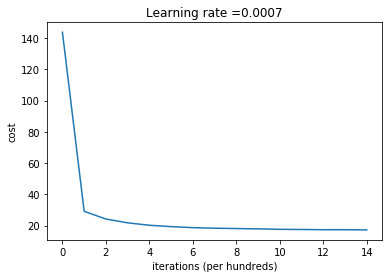

In [39]:
# train the model with the dataset values
parmeters = model(X_train, Y_train, layer_dims, mini_batch_size = 512, num_epochs = 150)

In [40]:
# finding training set accuracy
pred_train = predict(X_train, parmeters)
ans = np.where(Ytr.T == pred_train)[0].size
    
print("Accuracy: "  + str(ans / X_train.shape[1] * 100) + "%")

Accuracy: 98.85166666666667%


In [41]:
# get test set predictions
pred_test = predict(X_test, parmeters)
ans = np.where(Yte.T == pred_test)[0].size
    
print("Accuracy: "  + str(ans / X_test.shape[1] * 100) + "%")

Accuracy: 97.57000000000001%


The model predicted it as: 7


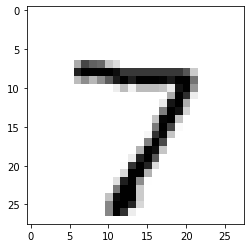

In [42]:
# check the predictions
i = 0
img = X_test[:, i]
img = img.reshape(28, 28)
plt.imshow(255-img, cmap='gray')

print("The model predicted it as: %i" %pred_test[:,i])